# Control PI por Asignación de Polos para un Sistema de Segundo Orden

En este codigo desarrollamos un control PI para un sistema representado en la forma tradicional de segundo orden. En este caso asignaremos en la ecuación característica deseada dos polos complejos conjugados y un polo real.

by: Sergio Andres Castaño Giraldo

https://controlautomaticoeducacion.com/

## Bibliotecas

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math

# install control 
# https://python-control.readthedocs.io/en/latest/intro.html
try:
    from control.matlab import *
except:
    !pip install slycot   
    !pip install control
    #conda install -c conda-forge control
    # restart kernel if this doesn't import
    from control.matlab import *

## Función de transferencia del proceso
Para este caso se desea controlar el nivel del segundo tanque () en un sistema de dos tanques en cascada.

La función de transferencia viene dado por:

$P = \frac{k}{s^2+as+b}=\frac{0.0006}{s^2+0.03271s+0.0002297}$

In [2]:
k = 0.0006;
a = 0.03271;
b = 0.0002297;
#P = signal.TransferFunction(k,[1,a,b]); #scipy
P = tf(k,[1,a,b]);
print(P)


          0.0006
---------------------------
s^2 + 0.03271 s + 0.0002297



El controlador PI viene representado por:

$C = \dfrac{K_cs+K_i}{s}$

donde:

$K_i=\dfrac{K_c}{\tau_i}$

## Ecuación característica de lazo cerrado
Cerrando el lazo de control con el controlador y la planta se obtiene la siguiente ecuación característica:

$P=s^3+as^2+(b+kK_p)s+kK_i$

## PI por Asignación de Polos
Se procede a encontrar el control por asignación de Polos por medio de unas condiciones de diseño. En este caso se establecen dons polos complejos conjugados y un polo real

In [3]:
# Especificaciones de Diseño
Mp=25; #Maximo Pico
ep=math.sqrt(((math.log(Mp/100))**2)/(math.pi**2+((math.log(Mp/100))**2)));
Tss = 400;
Wn=4/(ep*Tss);

El polo real es el encargado de reducir el máximo sobreimpulso y tambien aumentar o disminuir el tiempo de establecimiento. La proporción del polo real con los polos complejos conjugados es dado por:

$\beta=\dfrac{p_1}{\zeta\omega}$

Si la proporción es 1 no existirá sobreimpulso, a medida que aumenta la respuesta presenta mayor sobreimpulso

In [4]:
beta = a/(ep*Wn) - 2
print(beta)

1.2710000000000004


Calculo de los polos deseados según la ecuación característica:

Sabiendo que $p_1=\beta\zeta\omega_n$

$P_d = s^3+(\beta+2)\zeta\omega_ns^2+(2\beta\zeta^2+1)\omega_n^2s+\beta\zeta\omega_n^3$

In [5]:
s1 = complex(-ep*Wn,Wn*math.sqrt(1-ep**2))
s2 = complex(-ep*Wn,-Wn*math.sqrt(1-ep**2))
s3 = -beta*ep*Wn;

In [6]:
Sd1= [s1, s2, s3]
print(Sd1)

[(-0.01+0.022661800709135968j), (-0.01-0.022661800709135968j), -0.012710000000000004]


In [7]:
Pds=np.poly(Sd1)
print(Pds)

[1.00000000e+00 3.27100000e-02 8.67757211e-04 7.79831216e-06]


## Calculo de los parámetros del controlador

In [8]:
Kc=((2*beta*ep**2+1)*Wn**2-b)/k;      
Ki=(beta*ep*Wn**3)/k;                
ti=Kc/Ki;
td=0;

#Controlador PI
nc = [Kc, Ki];
dc = [1, 0];
#C = signal.TransferFunction(nc, dc)
C = tf(nc, dc);

## lazo cerrado de control

In [9]:
H = feedback(C*P,1);
print(H)


          0.0006381 s + 7.798e-06
-------------------------------------------
s^3 + 0.03271 s^2 + 0.0008678 s + 7.798e-06



In [10]:
Hi = stepinfo(H);
print(Hi)

{'RiseTime': 57.45745745745752, 'SettlingTime': 340.5405405405409, 'SettlingMin': 0.9039887466825883, 'SettlingMax': 1.2700284861394433, 'Overshoot': 26.874558033087613, 'Undershoot': 0.0, 'Peak': 1.2700284861394433, 'PeakTime': 137.3373373373375, 'SteadyStateValue': 1.0010111608099022}


In [11]:
y,t = step(H);

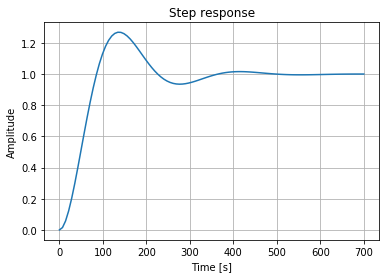

In [12]:
plt.plot(t,y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
plt.grid()